<a href="https://colab.research.google.com/github/sitaram000041/improval-insurance-ml-project/blob/main/hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Insurance_Claim_Approval.csv')
df.head(10)

,Claim_ID,Age,Claim_Amount,Claim_Type,Claim_Approved,Policy_Duration,Previous_Claims,Employment_Status,Income,Region,Customer_Rating
0,a2b19024-95b1-4d8d-b638-915c99efaf6f,29,18221.953701,Health,No,14,0,Unemployed,77151.283717,South,3.455448
1,ba33986b-d264-41e8-9013-a31b9a71c296,19,48953.944888,Accident,No,10,0,Employed,68593.554082,East,2.680455
2,4e7065ec-fbb3-40e8-8c11-8ef39d4a74d1,43,34796.199019,Property,No,16,1,Self-Employed,70050.038527,West,2.539976
3,8c18a52a-f151-446e-b184-624141fdab15,70,40540.849447,Life,Yes,3,2,Unemployed,33180.818989,East,4.130486
4,2cdf7d8e-1301-4afc-a0cf-3b5cfd909aec,48,30314.632110,Accident,No,17,0,Unemployed,108485.309094,North,2.238877
5,6de94057-5b99-4485-9a8e-9c6c3fbff96b,58,45257.407806,Accident,No,19,1,Employed,136845.228351,South,4.496722
6,57b7c065-4a1f-4189-9aeb-8ce7365b1e85,68,21204.268746,Accident,No,18,4,Employed,77929.764552,East,3.856189
7,5e3234a1-e2c3-4194-971d-53d472e323ed,73,45573.688959,Health,Yes,14,4,Self-Employed,125874.402516,South,1.838027
8,01b2bcac-6bd8-416e-a18b-c577de179123,66,NaN,Life,No,14,4,Self-Employed,65940.619298,North,2.573032
9,c5df5a52-d537-48e1-8782-c2b2539e2f0f,76,44678.351555,Property,No,9,4,Unemployed,142445.160569,East,1.099626


In [7]:
df.shape

(1500, 11)

In [8]:
data_col = df.columns.tolist()
print(data_col)

['Claim_ID', 'Age', 'Claim_Amount', 'Claim_Type', 'Claim_Approved', 'Policy_Duration', 'Previous_Claims', 'Employment_Status', 'Income', 'Region', 'Customer_Rating']


In [9]:
df.dtypes

,0
Claim_ID,object
Age,int64
Claim_Amount,float64
Claim_Type,object
Claim_Approved,object
Policy_Duration,int64
Previous_Claims,int64
Employment_Status,object
Income,float64
Region,object


In [10]:
df.describe()

,Age,Claim_Amount,Policy_Duration,Previous_Claims,Income,Customer_Rating
count,1500.000000,1408.000000,1500.000000,1500.000000,1500.000000,1414.000000
mean,48.262667,25840.364757,12.346000,2.000667,86477.662682,3.015869
std,17.755896,14300.009772,6.897197,1.434121,37317.220128,1.142824
min,18.000000,1018.260402,1.000000,0.000000,20040.986559,1.003442
25%,33.000000,13374.248031,6.750000,1.000000,53849.533169,2.062013
50%,48.000000,26013.384216,12.000000,2.000000,87247.453958,3.054137
75%,64.000000,38312.820533,18.000000,3.000000,119179.282052,3.956508
max,79.000000,49971.677208,24.000000,4.000000,149936.072457,4.994558


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Claim_ID           1500 non-null   object 
 1   Age                1500 non-null   int64  
 2   Claim_Amount       1408 non-null   float64
 3   Claim_Type         1500 non-null   object 
 4   Claim_Approved     1500 non-null   object 
 5   Policy_Duration    1500 non-null   int64  
 6   Previous_Claims    1500 non-null   int64  
 7   Employment_Status  1500 non-null   object 
 8   Income             1500 non-null   float64
 9   Region             1500 non-null   object 
 10  Customer_Rating    1414 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 129.0+ KB


In [12]:
df.isnull().sum()

,0
Claim_ID,0
Age,0
Claim_Amount,92
Claim_Type,0
Claim_Approved,0
Policy_Duration,0
Previous_Claims,0
Employment_Status,0
Income,0
Region,0


In [13]:
df.drop(columns=['Claim_ID'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1500 non-null   int64  
 1   Claim_Amount       1408 non-null   float64
 2   Claim_Type         1500 non-null   object 
 3   Claim_Approved     1500 non-null   object 
 4   Policy_Duration    1500 non-null   int64  
 5   Previous_Claims    1500 non-null   int64  
 6   Employment_Status  1500 non-null   object 
 7   Income             1500 non-null   float64
 8   Region             1500 non-null   object 
 9   Customer_Rating    1414 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 117.3+ KB


In [15]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns

In [16]:
print(num_columns)
print(cat_columns)

Index(['Age', 'Claim_Amount', 'Policy_Duration', 'Previous_Claims', 'Income',
       'Customer_Rating'],
      dtype='object')
Index(['Claim_Type', 'Claim_Approved', 'Employment_Status', 'Region'], dtype='object')


In [17]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1500 non-null   int64  
 1   Claim_Amount       1500 non-null   float64
 2   Claim_Type         1500 non-null   object 
 3   Claim_Approved     1500 non-null   object 
 4   Policy_Duration    1500 non-null   int64  
 5   Previous_Claims    1500 non-null   int64  
 6   Employment_Status  1500 non-null   object 
 7   Income             1500 non-null   float64
 8   Region             1500 non-null   object 
 9   Customer_Rating    1500 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 117.3+ KB


In [19]:
df.isnull().sum()

,0
Age,0
Claim_Amount,0
Claim_Type,0
Claim_Approved,0
Policy_Duration,0
Previous_Claims,0
Employment_Status,0
Income,0
Region,0
Customer_Rating,0


In [20]:
   from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [21]:
df


,Age,Claim_Amount,Claim_Type,Claim_Approved,Policy_Duration,Previous_Claims,Employment_Status,Income,Region,Customer_Rating
0,29,18221.953701,1,0,14,0,2,77151.283717,2,3.455448
1,19,48953.944888,0,0,10,0,0,68593.554082,0,2.680455
2,43,34796.199019,3,0,16,1,1,70050.038527,3,2.539976
3,70,40540.849447,2,1,3,2,2,33180.818989,0,4.130486
4,48,30314.632110,0,0,17,0,2,108485.309094,1,2.238877
...,...,...,...,...,...,...,...,...,...,...
1495,70,25840.364757,3,0,13,3,0,92876.296133,0,3.015869
1496,35,33579.609407,2,0,5,0,1,108844.871576,2,3.108628
1497,34,25840.364757,0,1,12,2,1,94990.375372,1,3.015869
1498,76,21993.472233,1,1,24,1,0,97856.958424,1,2.706364


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [23]:
df

,Age,Claim_Amount,Claim_Type,Claim_Approved,Policy_Duration,Previous_Claims,Employment_Status,Income,Region,Customer_Rating
0,0.180328,0.351430,1,0,0.565217,0.00,2,0.439665,2,0.614366
1,0.016393,0.979210,0,0,0.391304,0.00,0,0.373783,0,0.420187
2,0.409836,0.690002,3,0,0.652174,0.25,1,0.384996,3,0.384989
3,0.852459,0.807351,2,1,0.086957,0.50,2,0.101157,0,0.783501
4,0.491803,0.598454,0,0,0.695652,0.00,2,0.680890,1,0.309546
...,...,...,...,...,...,...,...,...,...,...
1495,0.852459,0.507056,3,0,0.521739,0.75,0,0.560724,0,0.504227
1496,0.278689,0.665150,2,0,0.173913,0.00,1,0.683659,2,0.527468
1497,0.262295,0.507056,0,1,0.478261,0.50,1,0.576999,1,0.504227
1498,0.950820,0.428473,1,1,1.000000,0.25,0,0.599068,1,0.426678


In [24]:
X = df.drop('Claim_Approved', axis=1)
y = df['Claim_Approved']

In [25]:
y

,Claim_Approved
0,0
1,0
2,0
3,1
4,0
...,...
1495,0
1496,0
1497,1
1498,1


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
df

,Age,Claim_Amount,Claim_Type,Claim_Approved,Policy_Duration,Previous_Claims,Employment_Status,Income,Region,Customer_Rating
0,0.180328,0.351430,1,0,0.565217,0.00,2,0.439665,2,0.614366
1,0.016393,0.979210,0,0,0.391304,0.00,0,0.373783,0,0.420187
2,0.409836,0.690002,3,0,0.652174,0.25,1,0.384996,3,0.384989
3,0.852459,0.807351,2,1,0.086957,0.50,2,0.101157,0,0.783501
4,0.491803,0.598454,0,0,0.695652,0.00,2,0.680890,1,0.309546
...,...,...,...,...,...,...,...,...,...,...
1495,0.852459,0.507056,3,0,0.521739,0.75,0,0.560724,0,0.504227
1496,0.278689,0.665150,2,0,0.173913,0.00,1,0.683659,2,0.527468
1497,0.262295,0.507056,0,1,0.478261,0.50,1,0.576999,1,0.504227
1498,0.950820,0.428473,1,1,1.000000,0.25,0,0.599068,1,0.426678


In [28]:
X_test

,Age,Claim_Amount,Claim_Type,Policy_Duration,Previous_Claims,Employment_Status,Income,Region,Customer_Rating
1116,0.163934,0.483669,3,0.869565,0.25,2,0.458990,1,0.697454
1368,0.114754,0.786624,0,0.608696,1.00,2,0.810307,3,0.915213
422,0.819672,0.937088,2,0.217391,0.50,2,0.833072,1,0.772875
413,0.950820,0.461340,0,0.956522,0.50,2,0.966944,1,0.343830
451,0.196721,0.763036,3,0.217391,1.00,0,0.807772,3,0.590996
...,...,...,...,...,...,...,...,...,...
983,0.819672,0.389259,3,0.695652,0.75,2,0.597436,2,0.678140
799,0.573770,0.507056,3,0.521739,1.00,0,0.380982,0,0.504227
1265,0.754098,0.273567,3,0.043478,0.25,1,0.684290,2,0.974764
1150,0.065574,0.316836,3,0.434783,1.00,2,0.774768,1,0.295003


In [29]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

In [31]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 0.5633333333333334
Logistic Regression Confusion Matrix:
 [[ 68  76]
 [ 55 101]]


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [35]:
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.52
Random Forest Confusion Matrix:
 [[67 77]
 [67 89]]


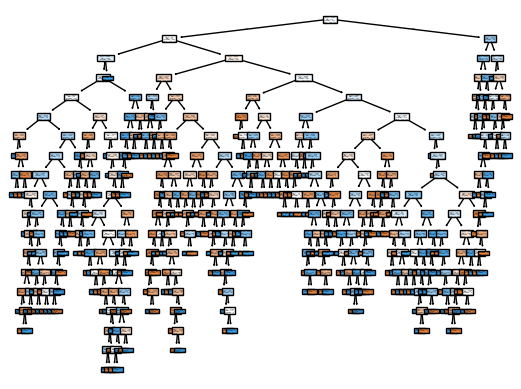

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [37]:
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [38]:
best_model

LogisticRegression()

In [39]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
